# Integrate and Fire - Basic Demo

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Integrate and Fire

### Define Class

In [29]:
class if_neuron:
    def __init__(self,dt=0.01):
        self.v = 0
        self.th = 30
        self.dt = dt
        self.C  = 1
    def update(self,Istim):
        ap_status = 0
        self.v += (Istim / self.C)*dt
        if self.v > self.th:
            self.v = 0
            ap_status = 1
        return self.v , ap_status

### Run Simulation

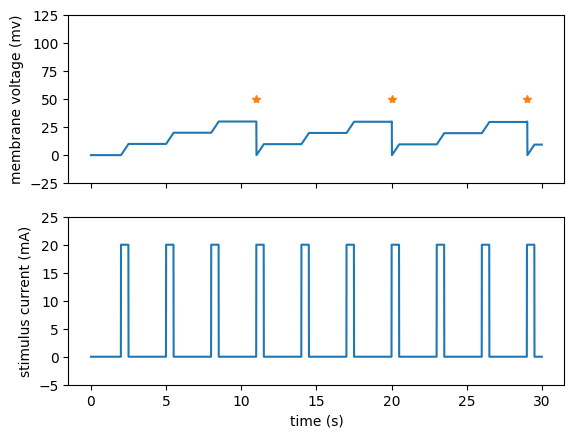

In [38]:
# DEFINE TIME #
dt   = 0.01
tmax = 30.0 
t    = np.arange(0.0, tmax, dt)

# DEFINE VECTORS #
v     = np.zeros(len(t))
Istim = np.zeros(len(t))

# DEFINE STIM STRENGTH
STIM_STRENGTH = 20

# CREATE A NEURON
n = if_neuron(dt)

# SIMULATE THE NEURON
ap_list = []
for i in range(len(t)-1): 

    if (t[i]-2)%3 <0.5:
        Istim[i] = STIM_STRENGTH

    v[i+1] , ap_status = n.update(Istim[i])
    
    if ap_status:
        ap_list.append(t[i])

ap_list = np.array(ap_list)

# PLOT IT #
f,a = plt.subplots(2,1,sharex=True)
a[0].plot(t,v)
a[0].set_ylabel('membrane voltage (mv)')
a[0].set_ylim([-25,125])
a[0].plot(ap_list, 50+0*ap_list,'*')
a[1].plot(t,Istim)
a[1].set_xlabel('time (s)')
a[1].set_ylabel('stimulus current (mA)')
a[1].set_ylim([-5,25])

plt.show()


## Leaky Integrate and Fire

### Define Class

In [41]:
class lif_neuron:
    def __init__(self,dt=0.01):
        self.v  = 0
        self.th = 30
        self.dt = dt
        self.C  = 1
        self.R  = 10
    def update(self,Istim):
        ap_status = 0
        self.v += dt * ( Istim/self.C - self.v/(self.R*self.C) )
        if self.v > self.th:
            self.v = 0
            ap_status = 1
        return self.v , ap_status

### Run Simulation

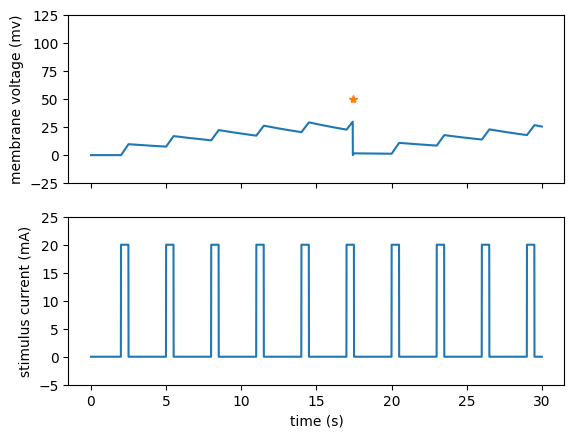

In [43]:
# DEFINE TIME #
dt   = 0.01
tmax = 30.0 
t    = np.arange(0.0, tmax, dt)

# DEFINE VECTORS #
v     = np.zeros(len(t))
Istim = np.zeros(len(t))

# DEFINE STIM STRENGTH
STIM_STRENGTH = 20

# CREATE A NEURON
n = lif_neuron(dt)

# SIMULATE THE NEURON
ap_list = []
for i in range(len(t)-1): 

    if (t[i]-2)%3 < 0.5:
        Istim[i] = STIM_STRENGTH

    v[i+1] , ap_status = n.update(Istim[i])

    if ap_status:
        ap_list.append(t[i])

ap_list = np.array(ap_list)

# PLOT IT #
f,a = plt.subplots(2,1,sharex=True)
a[0].plot(t,v)
a[0].set_ylabel('membrane voltage (mv)')
a[0].set_ylim([-25,125])
a[0].plot(ap_list , 50+0*ap_list , '*')
a[1].plot(t,Istim)
a[1].set_xlabel('time (s)')
a[1].set_ylabel('stimulus current (mA)')
a[1].set_ylim([-5,25])

plt.show()